In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
name_of_dirs = os.listdir("data\\dataset\\train")
print(name_of_dirs)

['graphics', 'historic', 'indoor', 'indoor studio of Czech TV', 'mix', 'outdoor country', 'outdoor human made', 'scene_type_other', 'speech']


In [7]:
scene = dict()
plt_scene = {"num_orig": list(), "num_individual": list(), "num_to_use": list()}
plt_lbl = {"num_orig": list(), "num_individual": list(), "num_to_use": list()}

for dir in name_of_dirs:
    scene[dir] = dict()
    imgs = os.listdir("data\\dataset\\train\\" + dir)
    
    for i, img in enumerate(imgs):
        imgs[i] = imgs[i].split("_")
        
        if imgs[i][0] in scene[dir].keys():
            scene[dir][imgs[i][0]].append(imgs[i][1])
        else:
            scene[dir][imgs[i][0]] = [imgs[i][1], ]
            
    plt_scene["num_orig"].append(len(imgs))
    plt_scene["num_individual"].append(len(scene[dir]))
    
    plt_lbl["num_orig"].append(dir + ": " + str(len(imgs)))
    plt_lbl["num_individual"].append(dir + ": " + str(len(scene[dir])))
    
    to_use = len(imgs) if len(imgs) < 600 else len(scene[dir])
    plt_scene["num_to_use"].append(to_use)
    plt_lbl["num_to_use"].append(dir + ": " + str(to_use))
    
plt_scene

{'num_orig': [875, 410, 12305, 2015, 425, 1342, 9152, 459, 200],
 'num_individual': [593, 152, 3285, 971, 289, 388, 2362, 206, 139],
 'num_to_use': [593, 410, 3285, 971, 425, 388, 2362, 459, 200]}

In [8]:

print("num_orig: ", sum(plt_scene["num_orig"]))
print("num_individual: ", sum(plt_scene["num_individual"]))
print("num_to_use: ", sum(plt_scene["num_to_use"]))

num_orig:  27183
num_individual:  8385
num_to_use:  9093


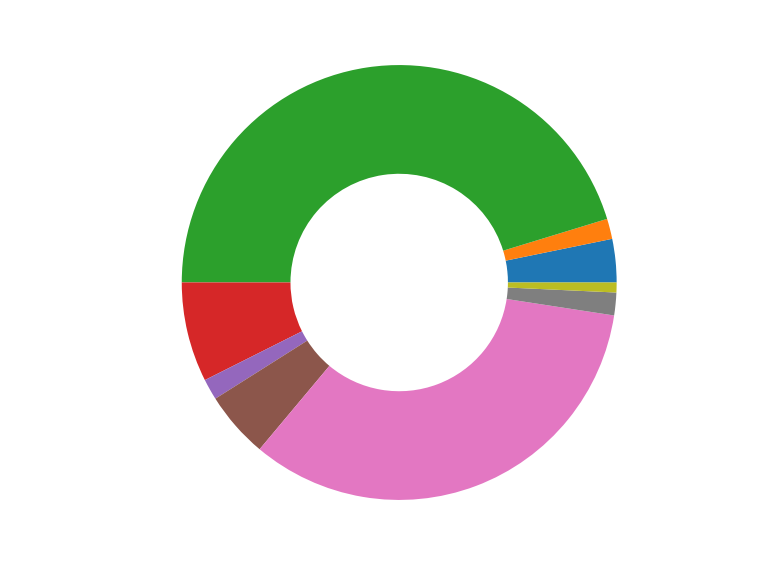

In [9]:
plt.subplots(figsize=(10,10))
plt.pie(plt_scene["num_orig"], labels=plt_lbl["num_orig"], textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.show()

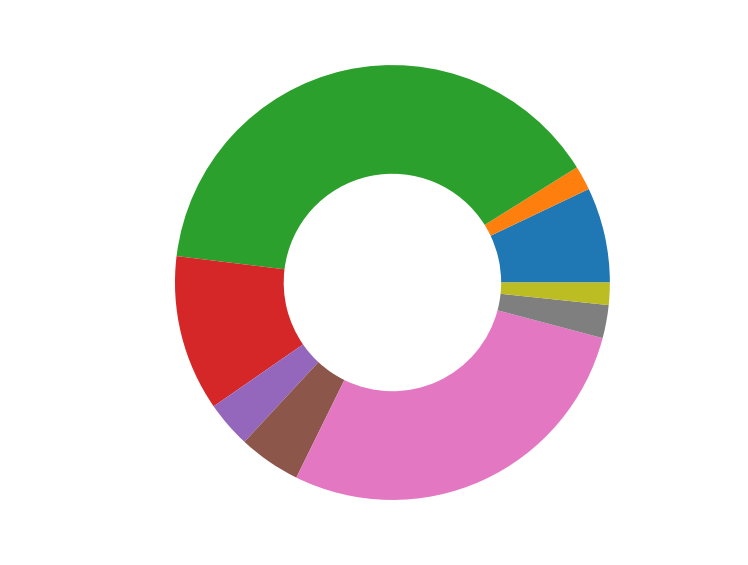

In [10]:
plt.subplots(figsize=(10,10))
plt.pie(plt_scene["num_individual"], labels=plt_lbl["num_individual"], textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.show()


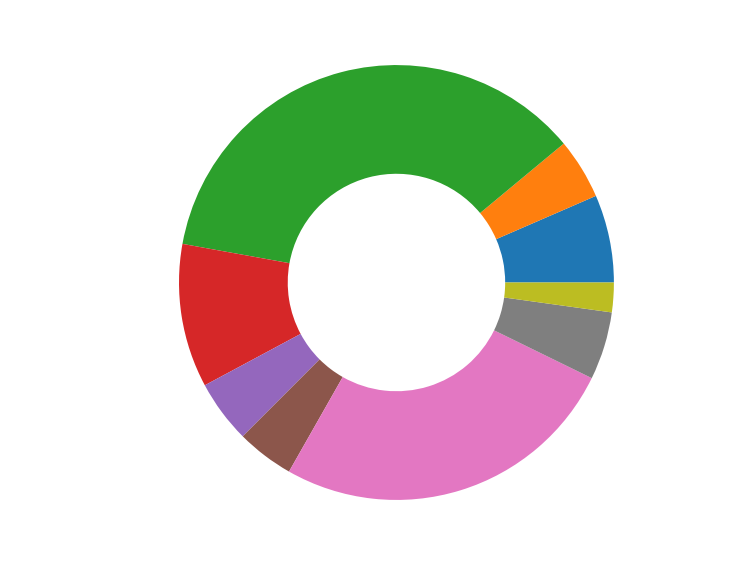

In [11]:
plt.subplots(figsize=(10,10))
plt.pie(plt_scene["num_to_use"], labels=plt_lbl["num_to_use"], textprops=dict(color="w"), wedgeprops=dict(width=0.5))
plt.show()


In [12]:
to_balance = list()
for i, c in enumerate(name_of_dirs):
    if plt_scene["num_orig"][i] != plt_scene["num_to_use"][i]:
        to_balance.append(c + " / from " + str(plt_scene["num_orig"][i])
                          + " to " + str(plt_scene["num_to_use"][i]))
        
to_balance

['graphics / from 875 to 593',
 'indoor / from 12305 to 3285',
 'indoor studio of Czech TV / from 2015 to 971',
 'outdoor country / from 1342 to 388',
 'outdoor human made / from 9152 to 2362']